In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from rgf.sklearn import RGFRegressor
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target,
                                                    test_size=0.1,
                                                    random_state=42)

In [3]:
rgf = RGFRegressor(max_leaf=30,
                   n_iter=5,
                   learning_rate=0.2,
                   algorithm="RGF",
                   test_interval=100,
                   loss="LS",
                   verbose=False)
rf = RandomForestRegressor(n_estimators=600,
                           min_samples_leaf=3,
                           max_depth=10,
                           random_state=42)
n_folds = 3

In [4]:
rgf_scores = cross_val_score(rgf,
                             X_train,
                             y_train,
                             scoring=make_scorer(mean_squared_error),
                             cv=n_folds)
rf_scores = cross_val_score(rf,
                            X_train,
                            y_train,
                            scoring=make_scorer(mean_squared_error),
                            cv=n_folds)

In [5]:
rgf_score = sum(rgf_scores)/n_folds
print('RGF Regressor MSE: {0:.5f}'.format(rgf_score))
rf_score = sum(rf_scores)/n_folds
print('Random Forest Regressor MSE: {0:.5f}'.format(rf_score))

RGF Regressor MSE: 3310.10304
Random Forest Regressor MSE: 3361.16454


In [6]:
y_pred_rgf = rgf.fit(X_train, y_train).predict(X_test)
y_pred_rf = rf.fit(X_train, y_train).predict(X_test)

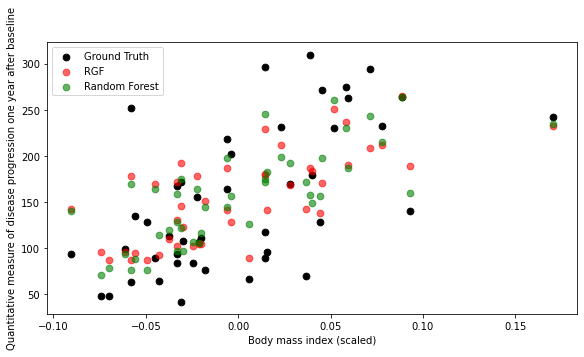

In [7]:
%matplotlib inline

plt.figure(figsize=(9.5,5))
origin_plot = plt.scatter(X_test[:, 2], y_test, s=45, color="black")
rgf_plot = plt.scatter(X_test[:, 2], y_pred_rgf, s=45, color="red", alpha=0.6)
rf_plot = plt.scatter(X_test[:, 2], y_pred_rf, s=45, color="green", alpha=0.6)
plt.xlabel("Body mass index (scaled)")
plt.ylabel("Quantitative measure of disease progression one year after baseline")
plt.legend([origin_plot, rgf_plot, rf_plot],
           ["Ground Truth", "RGF", "Random Forest"],
           loc="upper left")
plt.show()